### NETWORKS REPORT CODE FOR WILDBIRD AND SCOTCH DATASETS

## Group Members
1. Isaac O.A
2. Bridget D.
3. Michael G.
   
**NB**:This code is universal for the analysis of both datasets. First, you can run it on the wildbird data, and then after getting the results, you change the data_choice to the other data to get the results for the scotch as well. I also included a markdown section for each of the main executions so that we all can read and understand what the code is doing. 



In [5]:
import numpy as np  # Import numpy for numerical arrays and matrix operations
import numpy.linalg as lg  # Import linear algebra routines such as eigenvalue solvers
import networkx as nx  # Import NetworkX for building and analyzing graphs
import matplotlib.pyplot as plt  # Import matplotlib for plotting network visualizations
from networkx.algorithms.cycles import cycle_basis

import os  # Import os so that we can create folders and build file paths

def save_figure(fig_basename, dataset_name=None, folder="figures"):
    """
    Save the current matplotlib figure to a PNG file. If a dataset_name is
    provided, then the filename is prefixed with that name so that each
    dataset has its own copy of the figure. When the same code is run again
    for the same dataset and figure name, the file is overwritten rather than
    duplicated.
    """
    # Make sure the output folder exists before saving
    os.makedirs(folder, exist_ok=True)

    # Build the filename, including the dataset name if it is provided
    if dataset_name is not None:
        filename = f"{dataset_name}_{fig_basename}.png"
    else:
        filename = f"{fig_basename}.png"

    # Construct the full output path
    out_path = os.path.join(folder, filename)

    # Save the current figure to disk with good resolution
    plt.savefig(out_path, dpi=300, bbox_inches="tight")

    # Print a short confirmation message so that we know where the figure went
    print(f"Saved figure to: {out_path}")


In [6]:
import os  # Import os so that we can manage folders and file paths
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# Define a helper function that saves the current figure to a PNG file.
# If a dataset_name is provided, then the figure is stored inside a subfolder
# named after that dataset so that all plots for a given network are kept
# together in one place.
def save_figure(fig_basename, dataset_name=None, root_folder="figures"):
    # If a dataset name is given, we create a subfolder for that dataset
    if dataset_name is not None:
        out_folder = os.path.join(root_folder, dataset_name)
    else:
        out_folder = root_folder

    # Ensure that the output folder exists before saving
    os.makedirs(out_folder, exist_ok=True)

    # Build the output filename with a .png extension
    filename = f"{fig_basename}.png"

    # Construct the full path to the output file
    out_path = os.path.join(out_folder, filename)

    # Save the current figure to disk with good resolution and tight bounding box
    plt.savefig(out_path, dpi=300, bbox_inches="tight")

    # Print a short confirmation message showing where the figure was saved
    print(f"Saved figure to: {out_path}")


# Define a convenience function that adjusts the figure size, tightens the layout,
# saves the figure using the helper above, and then shows the plot. This function
# can be called at the end of any plotting block to keep the code concise.
def finalize_and_save(fig_basename, dataset_name=None, figsize=(10, 4)):
    # Get a handle to the current figure and set its size in inches
    fig = plt.gcf()
    fig.set_size_inches(figsize)

    # Adjust the layout so that labels, titles, and legends fit neatly
    plt.tight_layout()

    # Save the figure to the appropriate folder and filename
    save_figure(fig_basename, dataset_name=dataset_name)

    # Display the figure in the notebook
    plt.show()


## Load data using same code for both datasets

In [7]:
#Choose which ecological dataset to analyze in this session
# Use "Scotch" for the Scotch broom interaction web
# Use "Wildbird" for the wild bird social network
#dataset_choice = "Wildbird"  # Set this string to switch between the two datasets
dataset_choice = "Wildbird"  # Set this string to switch between the two datasets

# Map the chosen dataset name to the corresponding edge list file
# This code is to be used for both "Scotch.txt" and "Wildbird.txt" are in the current working directory
#if dataset_choice == "Wildbird":  # Check if the Scotch broom network is selected
if dataset_choice == "Wildbird":  # Check if the Scotch broom network is selected
    edge_file = "Wildbird.txt"  # File name for the Scotch broom interaction web
elif dataset_choice == "Scotch":  # Check if the wild bird social network is selected
    edge_file = "Scotch.txt"  # File name for the wild bird social association network
else:
    raise ValueError("dataset_choice must be either 'Scotch' or 'Wildbird'")  # Guard against invalid choices

# Read the weighted edge list from the selected file into a NetworkX graph
# By default this creates an undirected graph whose edges carry weight attributes
K = nx.read_weighted_edgelist(edge_file)  # Load the ecological network from the text file

# Print a short summary of the loaded graph to confirm that the data were read correctly
print(f"Loaded graph from {edge_file}")  # Report which file was used
print(f"Number of nodes: {K.number_of_nodes()}")  # Display how many nodes are in the network
print(f"Number of edges: {K.number_of_edges()}")  # Display how many edges are in the network
print(f"Is the graph directed? {K.is_directed()}")  # Check whether the imported graph is directed or undirected


Loaded graph from Wildbird.txt
Number of nodes: 169
Number of edges: 2758
Is the graph directed? False


## We can change this cell from markdown to code in Jupiter for the Scotch Broom Network analysis if switching the datasets in the above cell is problematic. Skip the next cell to collect data on the Wildbird first if you choose this option.

In [45]:
dataset_choice = "Scotch"  # Set this string to switch between the two datasets
if dataset_choice == "Scotch":  # Check if the Scotch broom network is selected
    edge_file = "Scotch.txt"  # File name for the Scotch broom interaction web
elif dataset_choice == "Wildbird":  # Check if the wild bird social network is selected
    edge_file = "Wildbird.txt"  # File name for the wild bird social association network
else:
    raise ValueError("dataset_choice must be either 'Scotch' or 'Wildbird'")  # Guard against invalid choices
K = nx.read_weighted_edgelist(edge_file)  # Load the ecological network from the text file

# Print a short summary of the loaded graph to confirm that the data were read correctly
print(f"Loaded graph from {edge_file}")  # Report which file was used
print(f"Number of nodes: {K.number_of_nodes()}")  # Display how many nodes are in the network
print(f"Number of edges: {K.number_of_edges()}")  # Display how many edges are in the network
print(f"Is the graph directed? {K.is_directed()}")  # Check whether the imported graph is directed or undirected


Loaded graph from Scotch.txt
Number of nodes: 154
Number of edges: 366
Is the graph directed? False


## Basic Graph Construction & Visualization


Saved figure to: figures\Wildbird\Wildbird_Network.png


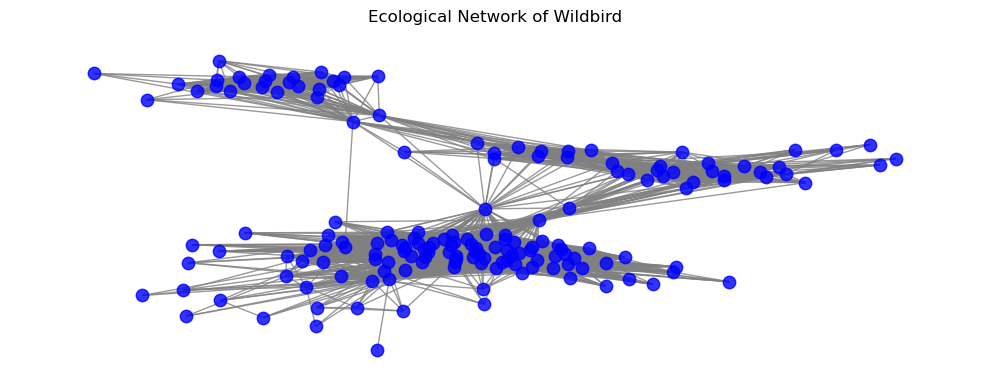

Basic Graph Properties:
Is the graph connected? True
Number of nodes: 169
Number of edges: 2758
Diameter of the graph: 5


In [8]:
# Convert the loaded graph K into an adjacency matrix
# This produces a NumPy array A_K where entry A_K[i,j] equals the edge weight between nodes i and j (0 if no edge exists)
A_K = nx.to_numpy_array(K)  # Create adjacency matrix representation of the network

# Determine the number of nodes in the graph for later use in computations
n = len(A_K)  # Store the number of nodes as an integer

# Reconstruct the graph from the adjacency matrix to ensure that nodes are labeled 0,1,2,...,n-1
# This step standardizes node labels, which simplifies later indexing of eigenvectors and arrays
K = nx.from_numpy_array(A_K)  # Build a new NetworkX graph using the adjacency matrix structure

# Define human-readable titles for each dataset so that the plot titles update automatically
dataset_titles = {
    "Wildbird": "Ecological Network of Wildbird",
    "Scotch": "Ecological Network of Scotch Broom"
}

# Select the appropriate plot title based on the current dataset, with a generic fallback
plot_title = dataset_titles.get(dataset_choice, f"Ecological Network of {dataset_choice}")

# Build a figure base name that also adapts to the dataset choice
figure_basename = f"{dataset_choice}_Network"

# Compute node positions using the spring layout algorithm
# The spring layout positions nodes by simulating physical repulsion and attraction forces
pos = nx.spring_layout(K, seed=42)  # Produce stable layout coordinates for plotting the graph

# Create a figure to draw the network using the computed spring layout
plt.figure(figsize=(8, 6))  # Set figure size for better readability

# Draw the network without node labels for clarity
nx.draw_networkx(
    K, pos=pos,
    node_color='blue', edge_color='gray',
    node_size=80, with_labels=False, alpha=0.8
)

# Add a title that matches the current dataset
plt.title(plot_title)

# Remove axes since they add no useful information for graph layouts
plt.axis('off')

# Save and show the figure for this dataset using the helper
finalize_and_save(figure_basename, dataset_name=dataset_choice)

# After visualization, print basic structural information about the graph for verification
print("Basic Graph Properties:")
print(f"Is the graph connected? {nx.is_connected(K)}")
print(f"Number of nodes: {K.number_of_nodes()}")
print(f"Number of edges: {K.number_of_edges()}")

# Compute and print the diameter of the graph if it is connected
if nx.is_connected(K):
    print(f"Diameter of the graph: {nx.diameter(K)}")
else:
    print("Graph is not connected; diameter is undefined")


###  Adjacency-Based Quantities & Spectral Analysis

In this section, we convert the ecological network into its adjacency matrix representation and compute several important algebraic quantities derived from it. The adjacency matrix (A) provides a complete numerical encoding of the network, where each entry records the presence and weight of edges between nodes. Using this matrix, we compute the degree vector by summing across rows, which captures how strongly each node is connected in the network.

We then perform an eigen-decomposition of the adjacency matrix. Because the graph is undirected and its adjacency matrix is symmetric, all eigenvalues are guaranteed to be real. The eigenvalues describe key structural features of the network, and the corresponding eigenvectors play a major role in spectral graph theory. In particular, the eigenvector associated with the **second-largest eigenvalue** is extracted, since it provides a natural two-way partition of the network and forms the basis for spectral community detection in the next section.

This spectral analysis serves as a bridge between the raw network representation and the structural insights uncovered in later steps.


In [9]:
# Extract the adjacency matrix again to ensure we are working with the
# standardized node labeling from the reconstructed graph K
A_K = nx.to_numpy_array(K)  # Convert the graph K into its adjacency matrix form

# Store the number of nodes n for convenience in later algebraic computations
n = len(A_K)  # Determine the size of the adjacency matrix

# Create a vector of all ones for computing the degree vector and other linear algebra operations
e = np.ones(n)  # Column vector of ones representing 1 for each node

# Compute the degree vector by multiplying the adjacency matrix by the vector of ones
# Since A_K[i,j] is the weight of edge (i,j), summing across rows gives weighted degrees
k = A_K @ e  # Degree vector where k[i] is the (weighted) degree of node i

# Perform eigen-decomposition of the adjacency matrix
# eigh() is used because A_K is symmetric (undirected graph), ensuring real eigenvalues
eigvals, eigvecs = lg.eigh(A_K)  # Compute eigenvalues and eigenvectors of the adjacency matrix

# Identify the indices that would sort the eigenvalues from smallest to largest
sorted_indices = np.argsort(eigvals)  # Sorting helps select specific eigenvalues like the second largest

# Identify the index corresponding to the second-largest eigenvalue
# This eigenvector is used in spectral partitioning of the graph
second_largest_index = sorted_indices[-2]  # Index of the second largest eigenvalue of A_K

# Extract the eigenvector associated with the second largest eigenvalue
v = eigvecs[:, second_largest_index]  # This vector will be used for spectral 2-way community detection

# Print out basic spectral information for inspection and interpretation
print("Spectral Information:")  # Header for the spectral values
print(f"Largest eigenvalue: {eigvals[sorted_indices[-1]]}")  # Display the largest eigenvalue
print(f"Second largest eigenvalue: {eigvals[sorted_indices[-2]]}")  # Display the second largest eigenvalue
print(f"Smallest eigenvalue: {eigvals[sorted_indices[0]]}")  # Display the smallest eigenvalue


Spectral Information:
Largest eigenvalue: 52.59480709913779
Second largest eigenvalue: 22.59086873641917
Smallest eigenvalue: -11.403263590390846


## Spectral Bipartition of the Network

In this section, we use the eigenvector associated with the second-largest eigenvalue of the adjacency matrix to divide the network into two communities. This method, known as spectral partitioning, assigns nodes to groups based on the sign of their corresponding eigenvector entries. Positive values form one community, and negative values form the other. We visualize the resulting two-way split and compute how many edges fall within each community versus how many connect across the groups. This provides a structural baseline for understanding modular organization in the ecological network.

Spectral 2-way partition based on the second-largest eigenvector
Size of community 1 (v >= 0): 90 nodes
Size of community 2 (v < 0): 79 nodes
Saved figure to: figures\Wildbird\Wildbird_Spectral_Bipartition.png


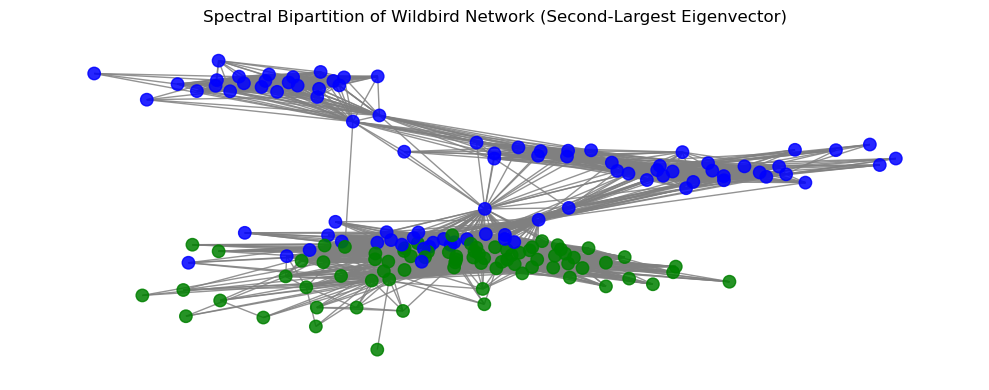

Edge counts relative to spectral communities
Edges within community 1: 875
Edges within community 2: 1168
Edges between communities: 715
Total edges accounted for: 2758
Total edges in graph: 2758
Do the counts match the graph? True


In [10]:
# Ensure we have access to the graph K, adjacency matrix A_K, and eigenvector v
# K is the undirected ecological network with nodes labeled 0, 1, ..., n-1
# A_K is its adjacency matrix, and v is the eigenvector for the second-largest eigenvalue

# Get the list of nodes in a consistent order
# For a graph built from a NumPy array, this should be [0, 1, 2, ..., n-1]
nodes = sorted(K.nodes())  # Sort node labels to match the ordering of rows and columns in A_K

# Create a dictionary that maps node labels to their index position
# This is useful if we want to relate nodes back to entries in algebraic vectors like v
node_index = {node: i for i, node in enumerate(nodes)}  # Node-to-index mapping for quick lookup

# Initialize two empty sets to store the nodes in each spectral community
community1 = set()  # Nodes where the corresponding entry in v is nonnegative
community2 = set()  # Nodes where the corresponding entry in v is negative

# Loop over each node and its position in the eigenvector v
# The sign of v[i] determines which community the node is assigned to
for i, val in enumerate(v):  # Iterate over indices and values of the eigenvector v
    if val >= 0:  # Check if the eigenvector value is nonnegative
        community1.add(nodes[i])  # Assign the corresponding node to the first community
    else:  # Otherwise the eigenvector value is negative
        community2.add(nodes[i])  # Assign the corresponding node to the second community

# Print basic information about the spectral partition
print("Spectral 2-way partition based on the second-largest eigenvector")
print(f"Size of community 1 (v >= 0): {len(community1)} nodes")
print(f"Size of community 2 (v < 0): {len(community2)} nodes")

# Recompute a spring layout for visualization if needed
# Using a fixed random seed generates reproducible node positions
pos = nx.spring_layout(K, seed=42)  # Compute node positions for plotting

# Assign colors based on community membership for visualization
# Nodes in community1 are colored blue, nodes in community2 are colored green
node_colors = []  # Initialize an empty list to store color for each node
for node in K.nodes():  # Loop over all nodes in the graph
    if node in community1:
        node_colors.append('blue')
    else:
        node_colors.append('green')

# Define dataset-specific titles for the spectral bipartition plot
spectral_titles = {
    "Wildbird": "Spectral Bipartition of Wildbird Network (Second-Largest Eigenvector)",
    "Scotch": "Spectral Bipartition of Scotch Broom Network (Second-Largest Eigenvector)"
}

# Select a plot title based on the current dataset, with a generic fallback
spectral_title = spectral_titles.get(
    dataset_choice,
    f"Spectral Bipartition of {dataset_choice} Network (Second-Largest Eigenvector)"
)

# Build a figure base name that adapts to the dataset choice
spectral_fig_basename = f"{dataset_choice}_Spectral_Bipartition"

# Create a new figure for the spectral partition visualization
plt.figure(figsize=(7, 5))  # Set a figure size that is large enough to see the structure clearly

# Draw the network with the community-based colors and no labels to avoid clutter
nx.draw_networkx(
    K, pos=pos,
    node_color=node_colors, edge_color='gray',
    node_size=80, with_labels=False, alpha=0.85
)

# Add a title indicating that the layout is based on a spectral 2-way partition
plt.title(spectral_title)

# Remove axes from the plot for a cleaner network visualization
plt.axis('off')

# Save and display the spectral bipartition figure for this dataset
finalize_and_save(spectral_fig_basename, dataset_name=dataset_choice)

# Initialize counters for edges in each category
edges_within_1 = 0  # Count edges where both endpoints lie in community 1
edges_within_2 = 0  # Count edges where both endpoints lie in community 2
edges_between = 0   # Count edges that connect a node in community 1 to a node in community 2

# Loop over all edges in the graph and classify them according to community membership
for u, w in K.edges():
    if u in community1 and w in community1:
        edges_within_1 += 1
    elif u in community2 and w in community2:
        edges_within_2 += 1
    else:
        edges_between += 1

# Compute the total number of edges accounted for by the three categories
total_accounted = edges_within_1 + edges_within_2 + edges_between

# Print summary statistics for the partitioned edges
print("Edge counts relative to spectral communities")
print(f"Edges within community 1: {edges_within_1}")
print(f"Edges within community 2: {edges_within_2}")
print(f"Edges between communities: {edges_between}")
print(f"Total edges accounted for: {total_accounted}")
print(f"Total edges in graph: {K.number_of_edges()}")
print(f"Do the counts match the graph? {total_accounted == K.number_of_edges()}")


### Clustering, Triangles, and Small Cycles

In this section, we compute key local structural features of the ecological network by examining how nodes form tightly connected groups. We begin by calculating the average clustering coefficient, which measures the tendency of a node’s neighbors to also be connected to each other. We then count the number of triangles using both NetworkX’s built-in method and an algebraic trace formula based on the adjacency matrix. Finally, we estimate the number of 4-cycles (squares) using a matrix-based expression involving $\text{trace}(A^4)$ and degree corrections. These small-cycle statistics provide insight into the network’s local cohesion and structural redundancies.


In [11]:
# This section computes clustering statistics and counts small cycles
# (triangles and 4-cycles) in the ecological network K.

# Compute the average clustering coefficient of the network
# This measures the local density of triangles around each node
C_ws = nx.average_clustering(K)  # Watts–Strogatz average clustering coefficient

# Print the value for reference
print(f"Average clustering coefficient: {C_ws}")  # Display the clustering coefficient

# Count triangles using NetworkX's built-in triangle counter
# nx.triangles(K) returns a dictionary with the number of triangles touching each node
triangle_dict = nx.triangles(K)  # Dictionary of triangle counts per node

# Each triangle is counted for all three of its vertices, so the sum must be divided by 3
triangles_nx = sum(triangle_dict.values()) // 3  # Total number of triangles in the network

# Print the number of triangles computed from NetworkX
print(f"Number of triangles (NetworkX): {triangles_nx}")  # Display triangle count

# Compute the number of triangles using the adjacency matrix trace formula
# trace(A^3) / 6 counts each triangle exactly once for undirected graphs
triangles_trace = np.trace(A_K @ A_K @ A_K) / 6  # Matrix-based triangle count

# Print the matrix-derived triangle count for verification
print(f"Number of triangles (trace formula): {triangles_trace}")  # Display trace(A^3)/6 result

# Define a function to count squares (4-cycles) based on adjacency algebra
def count_squares(A):
    n = len(A)  # Number of nodes
    e = np.ones(n)  # Vector of ones
    degrees = A @ e  # Degree sequence from adjacency matrix
    m = K.number_of_edges()  # Total number of edges in the graph

    A4 = A @ A @ A @ A  # Compute A^4
    trace_A4 = np.trace(A4)  # Trace of A^4

    # Sum of "degree choose 2" for all nodes
    sum_binom = sum(d * (d - 1) / 2 for d in degrees)

    # Formula for number of 4-cycles in an undirected graph
    num_squares = (trace_A4 - 2 * m - 4 * sum_binom) / 8

    return int(num_squares)  # Return the integer count of squares

# Use the function to count squares in our ecological network
num_squares = count_squares(A_K)  # Compute number of 4-cycles in the graph

# Print number of 4-cycles (squares)
print(f"Number of squares (4-cycles): {num_squares}")  # Display the square count


Average clustering coefficient: 0.7704009095040755
Number of triangles (NetworkX): 27886
Number of triangles (trace formula): 27886.0
Number of squares (4-cycles): 961915


### Comparison with Erdős–Rényi (ER) Null Models

In this section, we evaluate how structurally different the ecological network is from a purely random graph with the same size and edge density. To do this, we generate multiple Erdős–Rényi (ER) random graphs using the probability $ p = \frac{2m}{n(n-1)} $, which matches the expected number of edges in the real network. For each ER sample, we compute the clustering coefficient, the number of triangles, and the number of 4-cycles. We then average these values and compare them to the corresponding statistics of the empirical network. This comparison helps determine whether the observed clustering and small-cycle structure arise from non-random ecological organization rather than chance alone.


In [12]:
# This section generates Erdős–Rényi (ER) random graphs with the same
# number of nodes and approximately the same edge density as our ecological network.
# We then compare clustering, triangles, and 4-cycles between the real network
# and the ER null model averages.

# Count nodes and edges in the real ecological network
n = K.number_of_nodes()  # Number of nodes in the network
m = K.number_of_edges()  # Number of edges in the network

# Compute edge probability p for the ER model
# For an undirected graph: expected number of edges is p * n(n-1)/2 ≈ m
p = 2 * m / (n * (n - 1))  # Edge probability matched to the real graph density

# Number of ER samples to generate for averaging statistics
num_samples = 50  # Use 50 random graphs to stabilize estimates

# Lists to hold clustering, triangle counts, and 4-cycle counts for ER graphs
clustering_er = []  # Store clustering coefficient from each ER sample
triangles_er = []   # Store triangle counts from each ER sample
squares_er = []     # Store 4-cycle counts from each ER sample

# Loop to generate ER random graphs and compute statistics
for _ in range(num_samples):  # Repeat for the specified number of random samples
    K_er = nx.erdos_renyi_graph(n, p)  # Generate an ER graph with n nodes and probability p

    # Skip this sample if the ER graph is not connected
    # We compare with the real graph only if both are connected
    if not nx.is_connected(K_er):
        continue  # Move to the next ER sample

    # Compute the clustering coefficient for the ER sample
    clustering = nx.average_clustering(K_er)  # Compute WS clustering coefficient
    clustering_er.append(clustering)  # Store in the list

    # Count triangles in the ER graph using NetworkX
    tri = sum(nx.triangles(K_er).values()) // 3  # Each triangle counted 3 times
    triangles_er.append(tri)  # Store triangle count

    # Convert ER graph to adjacency matrix to compute squares
    A_er = nx.to_numpy_array(K_er)  # Adjacency matrix of ER graph

    # Count 4-cycles in the ER graph using the same function defined earlier
    C4 = count_squares(A_er)  # Compute number of 4-cycles
    squares_er.append(C4)  # Store the 4-cycle count

# Compute the ER average values for each statistic
C_er_avg = np.mean(clustering_er)  # Average ER clustering coefficient
C3_er_avg = np.mean(triangles_er)  # Average ER triangle count
C4_er_avg = np.mean(squares_er)    # Average ER 4-cycle count

# Define a helper function for comparing real vs ER values
def compare(real, random, name):
    if real > random:
        relation = "greater than"
    elif real < random:
        relation = "less than"
    else:
        relation = "equal to"
    print(f"{name}: Real ({real:.3f}) is {relation} ER average ({random:.3f})")

# Compare real network statistics with ER averages
compare(C_ws, C_er_avg, "Clustering Coefficient")  # Compare clustering
compare(triangles_trace, C3_er_avg, "Triangles (C3)")  # Compare triangle count
compare(num_squares, C4_er_avg, "Squares (C4)")  # Compare 4-cycle count


Clustering Coefficient: Real (0.770) is greater than ER average (0.194)
Triangles (C3): Real (27886.000) is greater than ER average (5758.640)
Squares (C4): Real (961915.000) is greater than ER average (139230.460)


###  Centrality Measures and Influential Nodes

In this section, we identify the most structurally important nodes in the ecological network using three standard centrality measures. Degree centrality captures how many direct connections a node has, closeness centrality measures how close a node is to all others through shortest paths, and betweenness centrality quantifies how often a node lies on paths between other pairs of nodes. After computing these measures, we rank the top five nodes under each criterion and generate visualizations that highlight these influential nodes within the network layout. This analysis helps reveal hubs, key intermediaries, and nodes that contribute disproportionately to information flow or ecological interactions.


Top 5 nodes by degree centrality: [55, 5, 10, 11, 34]
Top 5 nodes by closeness centrality: [164, 10, 5, 11, 22]
Top 5 nodes by betweenness centrality: [164, 51, 0, 49, 68]
Saved figure to: figures\Wildbird\Centrality_Panels.png


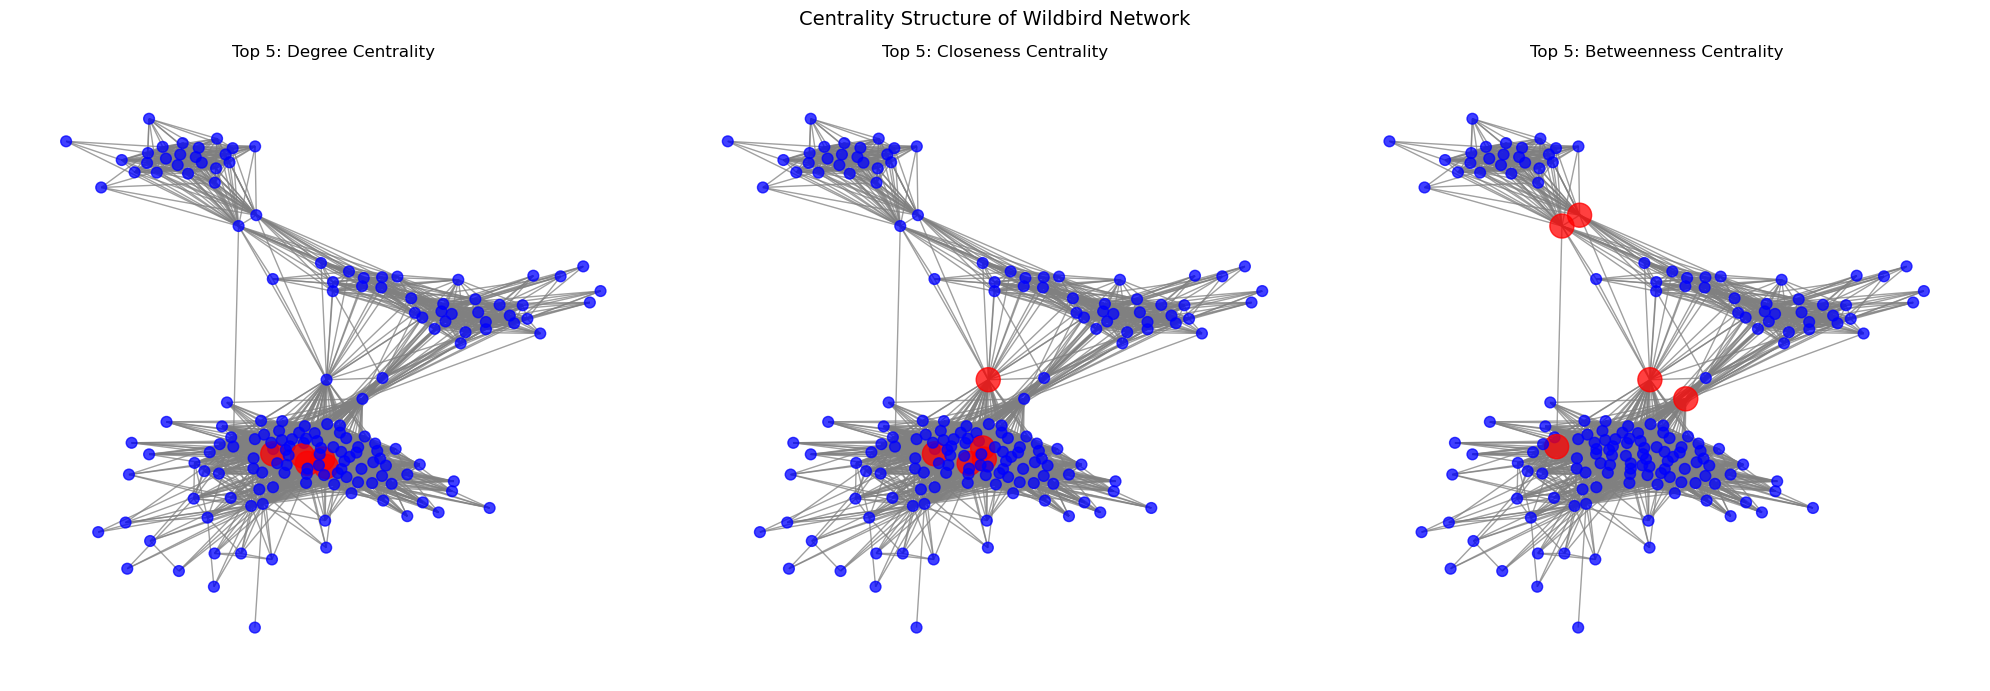

In [13]:
# Compute degree centrality for every node
degree_centrality = nx.degree_centrality(K)  # Degree centrality values

# Compute closeness centrality for every node
closeness_centrality = nx.closeness_centrality(K)  # Closeness centrality values

# Compute betweenness centrality for every node
betweenness_centrality = nx.betweenness_centrality(K)  # Betweenness centrality values

# Identify the top 5 nodes for each centrality measure
top_degree = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:5]
top_closeness = sorted(closeness_centrality, key=closeness_centrality.get, reverse=True)[:5]
top_betweenness = sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)[:5]

# Print the rankings so that we can interpret which nodes are most central
print("Top 5 nodes by degree centrality:", top_degree)
print("Top 5 nodes by closeness centrality:", top_closeness)
print("Top 5 nodes by betweenness centrality:", top_betweenness)

# Fix node positions for consistent visualization across the three panels
pos = nx.spring_layout(K, seed=42)

# Define dataset-specific titles for the centrality panel
centrality_titles = {
    "Wildbird": "Centrality Structure of Wildbird Network",
    "Scotch": "Centrality Structure of Scotch Broom Network"
}

# Select an overall title based on the current dataset, with a generic fallback
centrality_title = centrality_titles.get(
    dataset_choice,
    f"Centrality Structure of {dataset_choice} Network"
)

# Create a figure for the centrality visualizations with three subplots in one row
fig, axes = plt.subplots(1, 3, figsize=(20, 7))

# Define a helper function to draw each centrality-based subplot
def draw_subplot(ax, K, pos, highlight_nodes, title):
    node_colors = ['red' if node in highlight_nodes else 'blue' for node in K.nodes()]
    node_sizes = [300 if node in highlight_nodes else 60 for node in K.nodes()]
    
    nx.draw(
        K, pos,
        node_color=node_colors,
        node_size=node_sizes,
        edge_color='gray',
        with_labels=False,
        alpha=0.75,
        ax=ax
    )
    ax.set_title(title)
    ax.axis('off')

# Draw the three centrality panels for degree, closeness, and betweenness
draw_subplot(axes[0], K, pos, top_degree, "Top 5: Degree Centrality")
draw_subplot(axes[1], K, pos, top_closeness, "Top 5: Closeness Centrality")
draw_subplot(axes[2], K, pos, top_betweenness, "Top 5: Betweenness Centrality")

# Add an overall title that reflects which ecological network is being analyzed
fig.suptitle(centrality_title, fontsize=14)

# Save and display the centrality panel figure for this dataset
finalize_and_save("Centrality_Panels", dataset_name=dataset_choice, figsize=(20, 7))


### Robustness Analysis Under Node Removal

In this section, we evaluate how resilient the ecological network is to the loss of nodes, which corresponds to species removal or loss of highly interactive individuals. We consider three removal strategies: random removal, targeted removal by degree, and targeted removal by betweenness centrality. For each strategy, nodes are progressively removed according to a specified fraction, and after each removal step we measure the size of the largest connected component relative to the original network size. Random removal is averaged over multiple trials to reduce variability, while targeted removal uses a predetermined ranking of nodes based on either degree or betweenness. The resulting robustness curves show how quickly the network fragments under different types of perturbations and reveal whether it is more vulnerable to the loss of random nodes or to the removal of highly central nodes.


Saved figure to: figures\Wildbird\Robustness_Curves.png


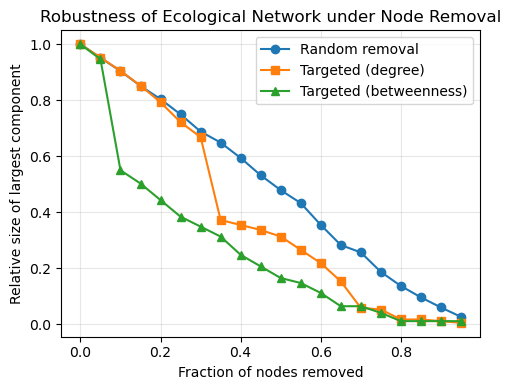

In [14]:
# This section performs robustness analysis of the ecological network K
# by progressively removing nodes and measuring the size of the largest
# connected component under three strategies:
# 1. Random removal
# 2. Targeted removal by degree centrality
# 3. Targeted removal by betweenness centrality

import copy  # Import copy to create independent graph copies for simulations

# Define a helper function to compute the size of the largest connected component
def largest_component_size(G):
    if G.number_of_nodes() == 0:  # Check for empty graph
        return 0  # No components exist when the graph is empty
    # Find all connected components and take the one with the maximum size
    largest_cc = max(nx.connected_components(G), key=len)  # Set of nodes in largest component
    return len(largest_cc)  # Return the size of the largest connected component

# Store the original number of nodes in the ecological network
n0 = K.number_of_nodes()  # Initial number of nodes in the graph

# Define the fractions of nodes to remove
# For example, 0.0, 0.05, 0.10, ..., 0.95
fractions = np.linspace(0.0, 0.95, 20)  # Array of removal fractions

# Set the number of random trials to average over for random removal
num_random_trials = 20  # More trials give smoother curves but increase computation time

# Initialize arrays to store robustness curves
# Each element corresponds to the relative largest component size at a given removal fraction
random_lcc = np.zeros_like(fractions)       # For random node removal
target_deg_lcc = np.zeros_like(fractions)   # For targeted removal by degree
target_betw_lcc = np.zeros_like(fractions)  # For targeted removal by betweenness

# Precompute centrality rankings for targeted attack strategies
# For targeted removal, we typically compute centrality on the original network once
degree_centrality_full = nx.degree_centrality(K)  # Degree centrality on original graph
betweenness_centrality_full = nx.betweenness_centrality(K)  # Betweenness centrality on original graph

# Sort nodes in descending order of degree centrality
nodes_by_degree = sorted(degree_centrality_full, key=degree_centrality_full.get, reverse=True)  # Degree ranking

# Sort nodes in descending order of betweenness centrality
nodes_by_betweenness = sorted(betweenness_centrality_full, key=betweenness_centrality_full.get, reverse=True)  # Betweenness ranking

# Compute robustness curve for targeted removal by degree centrality
# Nodes with highest degree are removed first
for i, f in enumerate(fractions):  # Loop over each removal fraction
    num_remove = int(f * n0)  # Number of nodes to remove at this fraction
    G_deg = copy.deepcopy(K)  # Create a fresh copy of the graph for this simulation

    # Select the first num_remove nodes from the sorted degree ranking
    nodes_to_remove_deg = nodes_by_degree[:num_remove]  # Nodes targeted for removal by degree
    G_deg.remove_nodes_from(nodes_to_remove_deg)  # Remove selected nodes from the graph copy

    # Compute and store normalized largest component size
    lcc_size_deg = largest_component_size(G_deg)  # Size of largest connected component
    target_deg_lcc[i] = lcc_size_deg / n0  # Normalize by original network size

# Compute robustness curve for targeted removal by betweenness centrality
# Nodes with highest betweenness are removed first
for i, f in enumerate(fractions):  # Loop over each removal fraction
    num_remove = int(f * n0)  # Number of nodes to remove at this fraction
    G_betw = copy.deepcopy(K)  # Create a fresh copy of the graph for this simulation

    # Select the first num_remove nodes from the sorted betweenness ranking
    nodes_to_remove_betw = nodes_by_betweenness[:num_remove]  # Nodes targeted for removal by betweenness
    G_betw.remove_nodes_from(nodes_to_remove_betw)  # Remove selected nodes from the graph copy

    # Compute and store normalized largest component size
    lcc_size_betw = largest_component_size(G_betw)  # Size of largest connected component
    target_betw_lcc[i] = lcc_size_betw / n0  # Normalize by original network size

# Compute robustness curve for random removal
# We average over multiple random trials for each fraction
for i, f in enumerate(fractions):  # Loop over each removal fraction
    num_remove = int(f * n0)  # Number of nodes to remove at this fraction

    lcc_sizes_trial = []  # List to store largest component sizes from different random trials

    for _ in range(num_random_trials):  # Repeat the experiment multiple times
        G_rand = copy.deepcopy(K)  # Fresh copy of the original graph for each trial

        # Select nodes to remove uniformly at random without replacement
        nodes_list = list(G_rand.nodes())  # List of current nodes in the graph
        nodes_to_remove_rand = np.random.choice(nodes_list, size=num_remove, replace=False)  # Random node subset

        # Remove the randomly selected nodes
        G_rand.remove_nodes_from(nodes_to_remove_rand)  # Apply random node removals

        # Compute the size of the largest connected component for this trial
        lcc_size_rand = largest_component_size(G_rand)  # Size of largest component after random removal
        lcc_sizes_trial.append(lcc_size_rand)  # Record this trial result

    # Average over trials and normalize by original network size
    random_lcc[i] = np.mean(lcc_sizes_trial) / n0  # Mean relative largest component size for random strategy

# Plot robustness curves for all three strategies on the same figure
plt.figure(figsize=(5, 4))  # Create a new figure with reasonable size

# Plot random, degree-targeted, and betweenness-targeted removal curves
plt.plot(fractions, random_lcc, marker='o', label='Random removal')        # Plot random strategy curve
plt.plot(fractions, target_deg_lcc, marker='s', label='Targeted (degree)') # Plot degree-based attack curve
plt.plot(fractions, target_betw_lcc, marker='^', label='Targeted (betweenness)')  # Plot betweenness-based attack curve

# Label axes and add title and legend
plt.xlabel("Fraction of nodes removed")  # X-axis label
plt.ylabel("Relative size of largest component")  # Y-axis label
plt.title("Robustness of Ecological Network under Node Removal")  # Plot title
plt.legend()  # Draw legend
plt.grid(alpha=0.3)  # Light grid for readability

# Save and display the robustness figure for this dataset
finalize_and_save("Robustness_Curves", dataset_name=dataset_choice, figsize=(5, 4))



## Community Detection and Modularity (Louvain Method)

In this section, we apply the Louvain algorithm to identify community structure within the ecological network. The Louvain method maximizes modularity, a measure of how well the network divides into internally dense and externally sparse groups. The algorithm assigns each node to a community based on local modularity gains, producing a hierarchical clustering with high computational efficiency. After computing the partition, we evaluate its modularity score to quantify the strength of the detected community structure. The resulting communities are then visualized by coloring nodes according to their community assignments, providing a clear view of the network’s mesoscale organization.

Louvain Community Detection Results
Number of detected communities: 5
Modularity value: 0.3726231712505147


C:\Users\amano\AppData\Local\Temp\ipykernel_32300\3751846772.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saved figure to: figures\Wildbird\Wildbird_Louvain_Communities.png


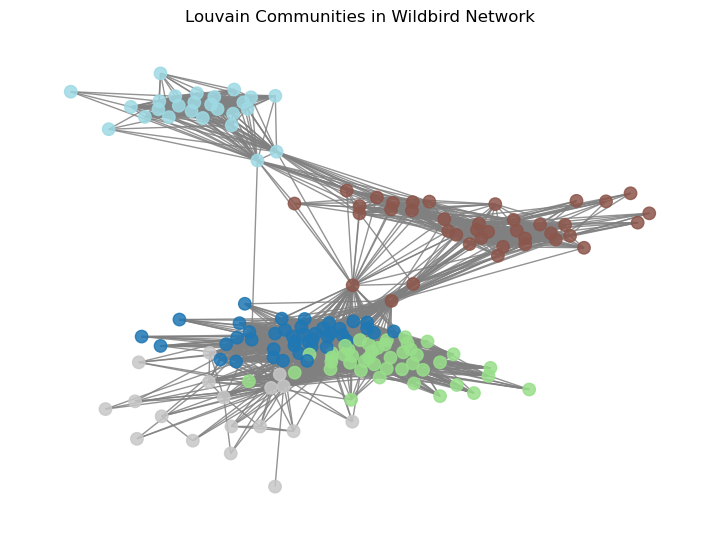

In [15]:
# This section performs community detection using the Louvain algorithm

from networkx.algorithms.community import louvain_communities  # Import Louvain from NetworkX

# Compute the Louvain communities
communities = louvain_communities(K, seed=42)  # Detect communities using Louvain method

# Compute modularity of the partition
modularity_value = nx.algorithms.community.modularity(K, communities)  # Compute modularity value

# Print results for inspection
print("Louvain Community Detection Results")
print(f"Number of detected communities: {len(communities)}")
print(f"Modularity value: {modularity_value}")

# Create a mapping from node to community index for visualization
node_to_comm = {}
for idx, comm in enumerate(communities):
    for node in comm:
        node_to_comm[node] = idx  # Assign each node a community index

# Color map for nodes based on community ID
node_colors = [node_to_comm[node] for node in K.nodes()]  # Community label used as color index

# Compute node positions for plotting
pos = nx.spring_layout(K, seed=42)  # Use a fixed seed so that the layout is reproducible

# Define dataset-specific titles for the Louvain community plot
louvain_titles = {
    "Wildbird": "Louvain Communities in Wildbird Network",
    "Scotch": "Louvain Communities in Scotch Broom Network"
}

# Choose an appropriate plot title based on the current dataset, with a generic fallback
louvain_title = louvain_titles.get(
    dataset_choice,
    f"Louvain Communities in {dataset_choice} Network"
)

# Build a figure base name that adapts to the dataset choice
louvain_fig_basename = f"{dataset_choice}_Louvain_Communities"

# Create and draw the community detection figure
plt.figure(figsize=(7, 5))  # Slightly larger figure for clearer visualization

nx.draw(
    K, pos,
    node_color=node_colors,      # Color nodes by their community ID
    cmap=plt.cm.tab20,           # Use a categorical colormap
    node_size=80,
    edge_color="gray",
    with_labels=False,
    alpha=0.85
)

# Add a dataset-specific title to the plot
plt.title(louvain_title)

# Remove axes for a cleaner network display
plt.axis("off")

# Save and show using the unified figure-saving helper
finalize_and_save(louvain_fig_basename, dataset_name=dataset_choice, figsize=(7, 5))


## Configuration Model Null Comparison

In this section, we compare the empirical ecological network to a degree-preserving null model using the configuration model. Unlike the Erdős–Rényi random graph, the configuration model generates networks with the exact same degree sequence as the real system, allowing us to test whether properties such as clustering or small-cycle abundance can be explained purely by degree heterogeneity. For each configuration model sample, we compute the average clustering coefficient, the number of triangles, and the number of 4-cycles. We then average these values across multiple samples and compare them to the corresponding statistics of the real network. This analysis helps clarify whether local structural patterns arise from higher-order ecological organization or from the degree distribution alone.

In [16]:
# This section constructs Configuration Model null graphs that preserve the
# degree sequence of the ecological network K. We then compare clustering,
# triangles, and 4-cycles between the real network and the configuration model.

# Extract the degree sequence of the original ecological network
degree_sequence = [d for _, d in K.degree()]  # List of degrees in node order

# Number of configuration model samples to average over
num_config_samples = 30  # Increase for smoother average, but 30 is usually enough

# Lists to store statistics from configuration model samples
clustering_conf = []   # Store clustering coefficients
triangles_conf = []    # Store triangle counts
squares_conf = []      # Store number of 4-cycles (squares)

for _ in range(num_config_samples):  # Loop over all samples
    # Generate a configuration model random graph
    # May contain parallel edges and self-loops
    G_conf_tmp = nx.configuration_model(degree_sequence, seed=None)  # Create configuration model graph

    # Convert to simple graph (remove parallel edges, remove self-loops)
    G_conf = nx.Graph(G_conf_tmp)  # Convert to simple undirected graph
    G_conf.remove_edges_from(nx.selfloop_edges(G_conf))  # Remove loops created by configuration model

    # Compute clustering coefficient
    clustering_conf.append(nx.average_clustering(G_conf))  # Compute average clustering

    # Count triangles in the configuration graph
    tri_conf = sum(nx.triangles(G_conf).values()) // 3  # Sum and divide by 3 for triangle count
    triangles_conf.append(tri_conf)  # Store triangle count

    # Convert to adjacency matrix to compute 4-cycles
    A_conf = nx.to_numpy_array(G_conf)  # Convert configuration model graph to adjacency matrix
    C4_conf = count_squares(A_conf)  # Use previously defined square-counting function
    squares_conf.append(C4_conf)  # Store square count

# Compute averages across configuration model samples
C_conf_avg = np.mean(clustering_conf)  # Average clustering
C3_conf_avg = np.mean(triangles_conf)  # Average triangles
C4_conf_avg = np.mean(squares_conf)    # Average squares

# Print comparison between real network and configuration model
print("Configuration Model Null Comparison")  # Header for output

print(f"Real clustering coefficient: {C_ws}")  # Real network clustering
print(f"Configuration model avg clustering: {C_conf_avg}")  # Config model clustering

print(f"Real triangles: {triangles_trace}")  # Real network triangle count
print(f"Configuration model avg triangles: {C3_conf_avg}")  # Average triangles

print(f"Real 4-cycles: {num_squares}")  # Real 4-cycle count
print(f"Configuration model avg 4-cycles: {C4_conf_avg}")  # Average 4-cycles


Configuration Model Null Comparison
Real clustering coefficient: 0.7704009095040755
Configuration model avg clustering: 0.2840178121875957
Real triangles: 27886.0
Configuration model avg triangles: 7500.2
Real 4-cycles: 961915
Configuration model avg 4-cycles: 195159.76666666666


### Saving Network Statistics to CSV

This section collects all structural metrics computed for the ecological network
and organizes them into a single summary table. The code compiles basic network
properties, clustering values, triangle and 4–cycle counts, null-model
comparisons, and community detection results from the Louvain algorithm. These
values are first saved as a per-dataset CSV file so that each run of the
analysis produces a standalone record for the network under study.

The code then updates a combined comparison CSV that aligns statistics from
multiple datasets horizontally, with each dataset occupying its own column.
This allows the Wildbird and Scotch networks to be analyzed separately while
automatically producing a unified comparison table that can be used to draw
clear structural conclusions across ecological systems.


In [17]:
import pandas as pd  # Import pandas so that we can assemble the summary table
import os  # Import os to check whether the combined CSV file already exists

# This dictionary stores all of the numerical results we computed in this analysis.
# Each entry in the "Statistic" list names a metric, and each entry in the "Value" list
# is the corresponding quantity computed for the current ecological network.
summary_dict = {
    "Statistic": [
        "Number of nodes",
        "Number of edges",
        "Is connected?",
        "Clustering coefficient (real)",
        "Triangles (real, trace formula)",
        "4-cycles (real)",
        "Modularity (Louvain)",
        "Number of Louvain communities",
        "Clustering coefficient (ER avg)",
        "Triangles (ER avg)",
        "4-cycles (ER avg)",
        "Clustering coefficient (Config avg)",
        "Triangles (Config avg)",
        "4-cycles (Config avg)"
    ],

    "Value": [
        K.number_of_nodes(),  # Store the total number of nodes in the ecological network
        K.number_of_edges(),  # Store the total number of edges in the ecological network
        nx.is_connected(K),  # Store a logical value indicating whether the graph is connected
        C_ws,  # Store the Watts–Strogatz clustering coefficient
        triangles_trace,  # Store the number of triangles using the trace formula
        num_squares,  # Store the number of 4-cycles (squares)
        modularity_value,  # Store the modularity score from the Louvain algorithm
        len(communities),  # Store the number of detected Louvain communities
        C_er_avg,  # Store the average clustering coefficient from the ER random graphs
        C3_er_avg,  # Store the average triangle count from the ER random graphs
        C4_er_avg,  # Store the average 4-cycle count from the ER random graphs
        C_conf_avg,  # Store the average clustering from the configuration model
        C3_conf_avg,  # Store the average triangle count from the configuration model
        C4_conf_avg  # Store the average 4-cycle count from the configuration model
    ]
}

# We convert this dictionary into a pandas DataFrame so that we can export it as a CSV file.
summary_table = pd.DataFrame(summary_dict)

# We now save a CSV file that contains all statistics for only the current dataset.
# The filename includes the dataset name so that files do not overwrite one another.
per_dataset_path = f"network_metrics_{dataset_choice}.csv"
summary_table.to_csv(per_dataset_path, index=False)
print(f"Saved per-dataset metrics to: {per_dataset_path}")

# We now prepare to update a combined CSV file that holds results from all datasets.
# This allows us to compare metrics from different ecological networks side by side.
current_df = summary_table.rename(columns={"Value": dataset_choice})

# The filename of the combined comparison CSV stays the same across runs.
comparison_path = "network_metrics_comparison.csv"

# If the comparison CSV already exists, then we load it and merge the new dataset column.
if os.path.exists(comparison_path):
    combined_df = pd.read_csv(comparison_path)

    # If results for this dataset were saved previously, we remove that old column
    # so that the updated values overwrite it cleanly.
    if dataset_choice in combined_df.columns:
        combined_df = combined_df.drop(columns=[dataset_choice])

    # We now merge the existing table with the current dataset results.
    combined_df = combined_df.merge(current_df, on="Statistic", how="outer")

# If this is the first dataset we are analyzing, then the combined table
# simply becomes the current dataset summary.
else:
    combined_df = current_df

# We save the updated comparison table so that both datasets appear side by side.
combined_df.to_csv(comparison_path, index=False)
print(f"Updated comparison metrics in: {comparison_path}")


Saved per-dataset metrics to: network_metrics_Wildbird.csv
Updated comparison metrics in: network_metrics_comparison.csv


### Viewing the Combined Summary of Network Statistics

This section loads and displays the comparison table that consolidates the
structural metrics from all analyzed datasets. Each ecological network appears
as a separate column, allowing the Wildbird and Scotch networks to be examined
side by side across all computed measures. Presenting the comparison table in
this way makes it easy to identify similarities and differences in network
structure, community organization, and null-model behavior.


In [18]:
### Displaying the Combined Comparison of Network Statistics

# This section reads the combined CSV file that stores summary statistics for
# all ecological networks analyzed so far. Each dataset appears as a separate
# column, and each row corresponds to a specific structural metric. Displaying
# this table allows us to directly compare the Wildbird and Scotch networks
# across all computed properties, including clustering, triangle counts,
# 4-cycles, null-model expectations, and community detection results.

import pandas as pd  # Import pandas so that we can load the comparison table

comparison_path = "network_metrics_comparison.csv"  # Path to the combined CSV file

# Read the comparison DataFrame from disk
comparison_table = pd.read_csv(comparison_path)

# Display the table so that we can visually inspect differences between datasets
comparison_table


Statistic               Scotch  \
0                   4-cycles (Config avg)    986.3666666666667   
1                       4-cycles (ER avg)    70.83333333333333   
2                         4-cycles (real)                 5368   
3     Clustering coefficient (Config avg)  0.11497081072641839   
4         Clustering coefficient (ER avg)  0.02969060160618602   
5           Clustering coefficient (real)  0.14103463293147905   
6                           Is connected?                 True   
7                    Modularity (Louvain)    0.528908746155454   
8           Number of Louvain communities                    7   
9                         Number of edges                  366   
10                        Number of nodes                  154   
11  Robustness AUC (betweenness-targeted)  0.06801948051948051   
12       Robustness AUC (degree-targeted)  0.08977272727272727   
13        Robustness AUC (random removal)   0.3743100649350649   
14                 Triangles (Config avg)                153.1   
15                     Triangles (ER avg)   17.583333333333332   
16        Triangles (real, trace formula)                358.0   

               Wildbird  
0    195159.76666666666  
1             139230.46  
2                961915  
3    0.2840178121875957  
4   0.19366297665169696  
5    0.7704009095040755  
6                  True  
7    0.3726231712505147  
8                     5  
9                  2758  
10                  169  
11                  NaN  
12                  NaN  
13                  NaN  
14               7500.2  
15              5758.64  
16              27886.0

### Basic Comparison of Network Statistics Between Datasets
This section reads the combined comparison table and computes simple numerical differences between the ecological networks. We calculate both the absolute difference and the percentage difference for each metric, which helps us see how much the Wildbird and Scotch networks differ in their structural properties.


In [30]:
### Basic Comparison of Network Statistics Between Datasets

# This section reads the combined comparison table and computes simple numerical
# differences between the ecological networks. We calculate both the absolute
# difference and the percentage difference for each metric so that we can see
# how much the Wildbird and Scotch networks differ in their structural properties.

import pandas as pd  # Import pandas so that we can load and manipulate the CSV table
import numpy as np   # Import numpy so that we can handle numeric operations safely

comparison_path = "network_metrics_comparison.csv"  # Path to the combined comparison CSV file

# We load the comparison table that contains one column per dataset and one row per statistic.
comparison_table = pd.read_csv(comparison_path)

# We identify the dataset columns automatically by excluding the "Statistic" column.
dataset_columns = [col for col in comparison_table.columns if col != "Statistic"]

# Here we assume that exactly two datasets have been analyzed (for example, Wildbird and Scotch).
# We unpack their names for clarity in the subsequent calculations.
dataset1, dataset2 = dataset_columns[0], dataset_columns[1]

# We make a copy of the original table so that we can add new columns of differences.
comparison_summary = comparison_table.copy()

# We convert the dataset columns to numeric values so that subtraction is well defined.
# Any non-numeric entries are converted to NaN (missing values) using errors='coerce'.
values1 = pd.to_numeric(comparison_summary[dataset1], errors="coerce")
values2 = pd.to_numeric(comparison_summary[dataset2], errors="coerce")

# We compute the absolute difference between the metric values of the two datasets.
comparison_summary["Difference"] = values1 - values2

# We compute the percentage difference relative to the second dataset.
# We replace zeros in the denominator with NaN to avoid division by zero.
safe_denominator = values2.replace(0, np.nan)
comparison_summary["Percent_difference"] = (comparison_summary["Difference"] / safe_denominator) * 100.0

# We display the summary so that we can interpret which network has larger or
# smaller values for each structural metric.
comparison_summary


Statistic               Scotch  \
0                   4-cycles (Config avg)    986.3666666666667   
1                       4-cycles (ER avg)    70.83333333333333   
2                         4-cycles (real)                 5368   
3     Clustering coefficient (Config avg)  0.11497081072641839   
4         Clustering coefficient (ER avg)  0.02969060160618602   
5           Clustering coefficient (real)  0.14103463293147905   
6                           Is connected?                 True   
7                    Modularity (Louvain)    0.528908746155454   
8           Number of Louvain communities                    7   
9                         Number of edges                  366   
10                        Number of nodes                  154   
11  Robustness AUC (betweenness-targeted)  0.06801948051948051   
12       Robustness AUC (degree-targeted)  0.08977272727272727   
13        Robustness AUC (random removal)   0.3743100649350649   
14                 Triangles (Config avg)                153.1   
15                     Triangles (ER avg)   17.583333333333332   
16        Triangles (real, trace formula)                358.0   

               Wildbird     Difference  Percent_difference  
0    195159.76666666666 -194173.400000          -99.494585  
1             139230.46 -139159.626667          -99.949125  
2                961915 -956547.000000          -99.441947  
3    0.2840178121875957      -0.169047          -59.519859  
4   0.19366297665169696      -0.163972          -84.668933  
5    0.7704009095040755      -0.629366          -81.693345  
6                  True            NaN                 NaN  
7    0.3726231712505147       0.156286           41.941990  
8                     5       2.000000           40.000000  
9                  2758   -2392.000000          -86.729514  
10                  169     -15.000000           -8.875740  
11   0.2542899408284023      -0.186270          -73.251211  
12  0.37869822485207094      -0.288925          -76.294389  
13     0.47646449704142      -0.102154          -21.440093  
14               7500.2   -7347.100000          -97.958721  
15              5758.64   -5741.056667          -99.694662  
16              27886.0  -27528.000000          -98.716202

### Comparing Structural Metrics Between Ecological Networks
This section loads the combined comparison table and computes numerical differences between the Wildbird and Scotch networks. These differences reveal how the two systems vary in clustering, motifs, community structure, and null-model deviations.

In [20]:
import pandas as pd  # Import pandas to load and manipulate the CSV file
import numpy as np   # Import numpy for numeric operations

comparison_path = "network_metrics_comparison.csv"  # Path to the combined summary table

# Load the comparison CSV produced earlier in the analysis
comparison_table = pd.read_csv(comparison_path)

# Identify the dataset names (for example: "Wildbird" and "Scotch")
dataset_columns = [col for col in comparison_table.columns if col != "Statistic"]
dataset1, dataset2 = dataset_columns[0], dataset_columns[1]

# Convert the dataset columns to numeric so that arithmetic is possible
values1 = pd.to_numeric(comparison_table[dataset1], errors="coerce")
values2 = pd.to_numeric(comparison_table[dataset2], errors="coerce")

# Create a new table for summary differences
comparison_summary = comparison_table.copy()

# Compute the difference between the datasets for each statistic
comparison_summary["Difference"] = values1 - values2

# Compute percent difference relative to the second dataset
safe_denominator = values2.replace(0, np.nan)
comparison_summary["Percent_difference"] = (comparison_summary["Difference"] / safe_denominator) * 100.0

# Display the resulting comparison so that structural differences can be interpreted
comparison_summary


Statistic               Scotch  \
0                   4-cycles (Config avg)    986.3666666666667   
1                       4-cycles (ER avg)    70.83333333333333   
2                         4-cycles (real)                 5368   
3     Clustering coefficient (Config avg)  0.11497081072641839   
4         Clustering coefficient (ER avg)  0.02969060160618602   
5           Clustering coefficient (real)  0.14103463293147905   
6                           Is connected?                 True   
7                    Modularity (Louvain)    0.528908746155454   
8           Number of Louvain communities                    7   
9                         Number of edges                  366   
10                        Number of nodes                  154   
11  Robustness AUC (betweenness-targeted)  0.06801948051948051   
12       Robustness AUC (degree-targeted)  0.08977272727272727   
13        Robustness AUC (random removal)   0.3743100649350649   
14                 Triangles (Config avg)                153.1   
15                     Triangles (ER avg)   17.583333333333332   
16        Triangles (real, trace formula)                358.0   

               Wildbird     Difference  Percent_difference  
0    195159.76666666666 -194173.400000          -99.494585  
1             139230.46 -139159.626667          -99.949125  
2                961915 -956547.000000          -99.441947  
3    0.2840178121875957      -0.169047          -59.519859  
4   0.19366297665169696      -0.163972          -84.668933  
5    0.7704009095040755      -0.629366          -81.693345  
6                  True            NaN                 NaN  
7    0.3726231712505147       0.156286           41.941990  
8                     5       2.000000           40.000000  
9                  2758   -2392.000000          -86.729514  
10                  169     -15.000000           -8.875740  
11                  NaN            NaN                 NaN  
12                  NaN            NaN                 NaN  
13                  NaN            NaN                 NaN  
14               7500.2   -7347.100000          -97.958721  
15              5758.64   -5741.056667          -99.694662  
16              27886.0  -27528.000000          -98.716202

### Null Model Comparison Using Z-scores

This section evaluates how strongly the real ecological network deviates from
null-model expectations by computing Z-scores for clustering, triangle counts,
and 4-cycle counts. For each metric, we compare the observed value to the mean
and standard deviation of two null models: the Erdős–Rényi random graph and the
degree-preserving configuration model. The resulting Z-scores quantify how many
standard deviations the real network lies above or below what would be expected
by chance. This approach provides a clear and interpretable measure of structural
non-randomness without relying on p-values, which are not appropriate for
single-network analyses. Higher positive Z-scores indicate stronger-than-random
organization, while negative values suggest lower-than-expected motifs or
clustering.


In [31]:
### Z-score Comparison Against Null Models (Without p-values)

# This section compares the real ecological network to its null-model
# expectations using Z-scores only. For each structural metric, we compute
# how many standard deviations the observed value lies above or below the
# mean of the null distribution. This provides a direct quantitative
# measure of how strongly the real network deviates from random expectation
# without relying on p-values, which are not appropriate for single-network
# analyses.

import numpy as np  # Import numpy for computing means and standard deviations
import pandas as pd  # Import pandas so that we can assemble the summary table

# Define a helper function that computes the null-model mean, standard deviation,
# and Z-score for a given list of null-sampled values.
def compute_null_stats(real_value, null_values):
    null_mean = np.mean(null_values)  # Average value under the null model
    null_std = np.std(null_values, ddof=1)  # Sample standard deviation
    # If the null distribution has zero variance, the Z-score cannot be computed.
    if null_std == 0:
        z = np.nan
    else:
        z = (real_value - null_mean) / null_std  # Compute Z-score
    return null_mean, null_std, z

# Compute null statistics for ER model comparisons
C_er_mean, C_er_std, z_C_er = compute_null_stats(C_ws, clustering_er)
T_er_mean, T_er_std, z_T_er = compute_null_stats(triangles_trace, triangles_er)
S_er_mean, S_er_std, z_S_er = compute_null_stats(num_squares, squares_er)

# Compute null statistics for configuration model comparisons
C_conf_mean, C_conf_std, z_C_conf = compute_null_stats(C_ws, clustering_conf)
T_conf_mean, T_conf_std, z_T_conf = compute_null_stats(triangles_trace, triangles_conf)
S_conf_mean, S_conf_std, z_S_conf = compute_null_stats(num_squares, squares_conf)

# Create a summary table showing the real value, null-model mean,
# null-model standard deviation, and Z-score for each metric.
z_summary = pd.DataFrame({
    "Metric": [
        "Clustering (vs ER)",
        "Triangles (vs ER)",
        "4-cycles (vs ER)",
        "Clustering (vs Config)",
        "Triangles (vs Config)",
        "4-cycles (vs Config)"
    ],
    "Real_value": [
        C_ws,
        triangles_trace,
        num_squares,
        C_ws,
        triangles_trace,
        num_squares
    ],
    "Null_mean": [
        C_er_mean,
        T_er_mean,
        S_er_mean,
        C_conf_mean,
        T_conf_mean,
        S_conf_mean
    ],
    "Null_std": [
        C_er_std,
        T_er_std,
        S_er_std,
        C_conf_std,
        T_conf_std,
        S_conf_std
    ],
    "Z_score": [
        z_C_er,
        z_T_er,
        z_S_er,
        z_C_conf,
        z_T_conf,
        z_S_conf
    ]
})

# Display the null-model comparison table so that we can interpret
# how unusual each real metric is relative to the null distribution.
z_summary


Metric     Real_value      Null_mean     Null_std  \
0      Clustering (vs ER)       0.770401       0.193663     0.003277   
1       Triangles (vs ER)   27886.000000    5758.640000   250.949280   
2        4-cycles (vs ER)  961915.000000  139230.460000  8067.335079   
3  Clustering (vs Config)       0.770401       0.284018     0.006308   
4   Triangles (vs Config)   27886.000000    7500.200000   229.731237   
5    4-cycles (vs Config)  961915.000000  195159.766667  8012.829380   

      Z_score  
0  175.985663  
1   88.174630  
2  101.977237  
3   77.106664  
4   88.737606  
5   95.690947

## Comparison

In [32]:
# Convert both dataset columns to numeric for correct plotting
comparison_table[dataset1] = pd.to_numeric(comparison_table[dataset1], errors="coerce")
comparison_table[dataset2] = pd.to_numeric(comparison_table[dataset2], errors="coerce")


In [33]:
### Preparing the comparison table for plotting

# This section ensures that the comparison table has numeric values for each
# dataset column so that we can generate meaningful plots. We also identify the
# names of the two ecological networks from the table.

import pandas as pd  # Import pandas for working with the comparison CSV
import numpy as np   # Import numpy for numerical operations
import matplotlib.pyplot as plt  # Import matplotlib for plotting

comparison_path = "network_metrics_comparison.csv"  # Path to the combined CSV file

# Read the combined comparison table from disk
comparison_table = pd.read_csv(comparison_path)

# Identify the dataset columns by excluding the "Statistic" column
dataset_columns = [col for col in comparison_table.columns if col != "Statistic"]
dataset1, dataset2 = dataset_columns[0], dataset_columns[1]

# Convert the dataset columns to numeric values so that plotting uses true numbers
comparison_table[dataset1] = pd.to_numeric(comparison_table[dataset1], errors="coerce")
comparison_table[dataset2] = pd.to_numeric(comparison_table[dataset2], errors="coerce")


## Linear-scale plot for bounded metrics (clustering, modularity)

In [34]:
### Plotting clustering and modularity on a linear scale

# This section compares metrics that lie between 0 and 1, such as the real
# clustering coefficient and the Louvain modularity. We shorten the x-axis
# labels to keep the visualization clean and readable.

# Shortened labels for the x-axis that match the original metrics
metrics_linear_short = [
    "Cluster (Real)",
    "Cluster (ER)",
    "Cluster (Conf)",
    "Modularity"
]

# Map the shortened labels to the full metric names used in the table
metric_mapping_linear = {
    "Cluster (Real)": "Clustering coefficient (real)",
    "Cluster (ER)": "Clustering coefficient (ER avg)",
    "Cluster (Conf)": "Clustering coefficient (Config avg)",
    "Modularity": "Modularity (Louvain)"
}

# Extract the relevant rows from the comparison table
original_linear_names = list(metric_mapping_linear.values())
linear_data = comparison_table[comparison_table["Statistic"].isin(original_linear_names)]

# Create positions for the grouped bar chart
x_positions = np.arange(len(metrics_linear_short))
bar_width = 0.35  # Width of each bar for grouped plotting

plt.figure(figsize=(9, 5))  # Create a new figure with reasonable size

# Plot values for the first dataset
plt.bar(
    x_positions - bar_width / 2,
    linear_data[dataset1],
    width=bar_width,
    label=dataset1
)

# Plot values for the second dataset
plt.bar(
    x_positions + bar_width / 2,
    linear_data[dataset2],
    width=bar_width,
    label=dataset2
)

# Apply the shortened labels to the x-axis
plt.xticks(x_positions, metrics_linear_short, rotation=20, ha="right")

# Add y-axis label and plot title
plt.ylabel("Metric value")
plt.title("Clustering and Modularity for Wildbird and Scotch Networks")

# Add a legend to distinguish datasets
plt.legend()

# Save the comparison figure (no dataset_name because this is a cross-network plot)
finalize_and_save("Clustering_Modularity_Comparison", dataset_name=None, figsize=(9, 5))


Saved figure to: figures\Clustering_Modularity_Comparison.png


## Log-scale plot for motif counts (triangles and 4-cycles)

In [35]:
### Plotting motif counts (triangles and 4-cycles) on a log scale

# This section compares triangle and 4-cycle counts between the two ecological
# networks. Since motif counts can span several orders of magnitude, we apply a
# logarithmic scale on the y-axis to improve readability.

# Shorter labels for the x-axis so that the plot remains clean and readable
metrics_log = [
    "Triangles (Real)",
    "Triangles (ER)",
    "Triangles (Conf)",
    "4-cycles (Real)",
    "4-cycles (ER)",
    "4-cycles (Conf)"
]

# Map the shortened labels back to the original Statistic entries
metric_mapping = {
    "Triangles (Real)": "Triangles (real, trace formula)",
    "Triangles (ER)": "Triangles (ER avg)",
    "Triangles (Conf)": "Triangles (Config avg)",
    "4-cycles (Real)": "4-cycles (real)",
    "4-cycles (ER)": "4-cycles (ER avg)",
    "4-cycles (Conf)": "4-cycles (Config avg)"
}

# Extract the corresponding rows from the comparison table
original_names = list(metric_mapping.values())
log_data = comparison_table[comparison_table["Statistic"].isin(original_names)]

# Create positions for the grouped bar chart
x_positions = np.arange(len(metrics_log))
bar_width = 0.35  # Width of the bars for each dataset

plt.figure(figsize=(10, 5))  # Define the figure size

# Plot the motif counts for the first dataset
plt.bar(
    x_positions - bar_width / 2,
    log_data[dataset1],
    width=bar_width,
    label=dataset1
)

# Plot the motif counts for the second dataset
plt.bar(
    x_positions + bar_width / 2,
    log_data[dataset2],
    width=bar_width,
    label=dataset2
)

# Use a logarithmic y-axis to handle the scale differences
plt.yscale("log")

# Assign the shortened labels to the x-axis
plt.xticks(x_positions, metrics_log, rotation=20, ha="right")

# Add descriptive axis labels and a plot title
plt.ylabel("Motif count (log scale)")
plt.title("Triangle and 4-cycle Counts in Wildbird and Scotch Networks")

# Add a legend to indicate which dataset each bar corresponds to
plt.legend()

# Save the plot using the unified saving function for comparison figures
finalize_and_save("Triangles_4Cycles_Comparison", dataset_name=None, figsize=(10, 5))


Saved figure to: figures\Triangles_4Cycles_Comparison.png


## Detailed Robustness

In [36]:
### Summarizing and Saving Robustness Analysis

# This section computes summary statistics from the robustness curves and saves
# both the detailed curves and their aggregate measures. The area under each
# robustness curve (AUC) provides a single-number summary of how resilient the
# network is to node removal under different strategies. We also export the full
# robustness curves to CSV so that we can compare Wildbird and Scotch directly.

import numpy as np  # Import numpy for numerical integration
import pandas as pd  # Import pandas so that we can save robustness results

# Compute the area under each robustness curve using the trapezoidal rule.
# Larger AUC values indicate higher overall robustness across the full range of
# removal fractions.
auc_random = np.trapz(random_lcc, fractions)        # AUC for random node removal
auc_deg = np.trapz(target_deg_lcc, fractions)       # AUC for degree-based targeted removal
auc_betw = np.trapz(target_betw_lcc, fractions)     # AUC for betweenness-based targeted removal

print("Robustness summary (area under curve):")
print(f"Random removal AUC: {auc_random}")
print(f"Targeted (degree) removal AUC: {auc_deg}")
print(f"Targeted (betweenness) removal AUC: {auc_betw}")

# Assemble a detailed table for the robustness curves at each removal fraction.
# This table contains the fraction removed and the corresponding normalized
# largest component sizes for all three attack strategies.
robustness_dict = {
    "Fraction_removed": fractions,
    "LCC_random": random_lcc,
    "LCC_target_degree": target_deg_lcc,
    "LCC_target_betweenness": target_betw_lcc
}

robustness_table = pd.DataFrame(robustness_dict)  # Build a DataFrame from the robustness results

# Save the detailed robustness curves to a per-dataset CSV file so that Wildbird
# and Scotch can later be compared by overlaying their robustness profiles.
robustness_path = f"robustness_curves_{dataset_choice}.csv"
robustness_table.to_csv(robustness_path, index=False)
print(f"Saved robustness curves to: {robustness_path}")


Robustness summary (area under curve):
Random removal AUC: 0.47646449704142
Targeted (degree) removal AUC: 0.37869822485207094
Targeted (betweenness) removal AUC: 0.25428994082840223
Saved robustness curves to: robustness_curves_Wildbird.csv


C:\Users\amano\AppData\Local\Temp\ipykernel_32300\3410567396.py:15: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  auc_random = np.trapz(random_lcc, fractions)        # AUC for random node removal
C:\Users\amano\AppData\Local\Temp\ipykernel_32300\3410567396.py:16: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  auc_deg = np.trapz(target_deg_lcc, fractions)       # AUC for degree-based targeted removal
C:\Users\amano\AppData\Local\Temp\ipykernel_32300\3410567396.py:17: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  auc_betw = np.trapz(target_betw_lcc, fractions)     # AUC for betweenness-based targeted removal


In [37]:
import pandas as pd
import os

### Saving Network Statistics to CSV

# This dictionary stores all of the numerical results we computed in this analysis.
summary_dict = {
    "Statistic": [
        "Number of nodes",
        "Number of edges",
        "Is connected?",
        "Clustering coefficient (real)",
        "Triangles (real, trace formula)",
        "4-cycles (real)",
        "Modularity (Louvain)",
        "Number of Louvain communities",
        "Clustering coefficient (ER avg)",
        "Triangles (ER avg)",
        "4-cycles (ER avg)",
        "Clustering coefficient (Config avg)",
        "Triangles (Config avg)",
        "4-cycles (Config avg)",
        "Robustness AUC (random removal)",
        "Robustness AUC (degree-targeted)",
        "Robustness AUC (betweenness-targeted)"
    ],

    "Value": [
        K.number_of_nodes(),  # Store the total number of nodes in the ecological network
        K.number_of_edges(),  # Store the total number of edges in the ecological network
        nx.is_connected(K),  # Store a logical value indicating whether the graph is connected
        C_ws,  # Store the Watts–Strogatz clustering coefficient
        triangles_trace,  # Store the number of triangles using the trace formula
        num_squares,  # Store the number of 4-cycles (squares)
        modularity_value,  # Store the modularity score from the Louvain algorithm
        len(communities),  # Store the number of detected Louvain communities
        C_er_avg,  # Store the average clustering coefficient from the ER random graphs
        C3_er_avg,  # Store the average triangle count from the ER random graphs
        C4_er_avg,  # Store the average 4-cycle count from the ER random graphs
        C_conf_avg,  # Store the average clustering from the configuration model
        C3_conf_avg,  # Store the average triangle count from the configuration model
        C4_conf_avg,  # Store the average 4-cycle count from the configuration model
        auc_random,  # Store the robustness area under the curve for random removal
        auc_deg,  # Store the robustness area under the curve for degree-targeted removal
        auc_betw  # Store the robustness area under the curve for betweenness-targeted removal
    ]
}

# The rest of your saving code (per-dataset CSV + combined comparison CSV)
# stays exactly as we wrote it before.
summary_table = pd.DataFrame(summary_dict)

per_dataset_path = f"network_metrics_{dataset_choice}.csv"
summary_table.to_csv(per_dataset_path, index=False)
print(f"Saved per-dataset metrics to: {per_dataset_path}")

current_df = summary_table.rename(columns={"Value": dataset_choice})

comparison_path = "network_metrics_comparison.csv"

if os.path.exists(comparison_path):
    combined_df = pd.read_csv(comparison_path)
    if dataset_choice in combined_df.columns:
        combined_df = combined_df.drop(columns=[dataset_choice])
    combined_df = combined_df.merge(current_df, on="Statistic", how="outer")
else:
    combined_df = current_df

combined_df.to_csv(comparison_path, index=False)
print(f"Updated comparison metrics in: {comparison_path}")


Saved per-dataset metrics to: network_metrics_Wildbird.csv
Updated comparison metrics in: network_metrics_comparison.csv


### Comparative Robustness Visualization

This section visualizes how the Wildbird and Scotch networks respond to node
removal under three different strategies: random failure, targeted removal of
high-degree nodes, and targeted removal of high-betweenness nodes. For each
strategy, the plots show how the relative size of the largest connected
component declines as an increasing fraction of nodes is removed. By overlaying
the curves for both datasets, we can directly assess which network is more
robust or more fragile under specific types of perturbation, providing a clear
structural comparison of resilience between the two ecological systems.


In [38]:
### Comparing Robustness Between Ecological Networks

# This section loads the robustness curves that were previously saved for each
# ecological network. For each removal strategy (random, degree-targeted, and
# betweenness-targeted), we overlay the robustness curves for the Wildbird and
# Scotch networks. This allows us to directly compare how quickly each network
# fragments under different types of node removal.

import pandas as pd  # Load pandas for reading the robustness CSV files
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# List of dataset names whose robustness curves have been computed
dataset_names = ["Wildbird", "Scotch"]

# Read each robustness CSV file and store them in a dictionary
robustness_data = {}  # Initialize a container for all datasets
for name in dataset_names:
    path = f"robustness_curves_{name}.csv"  # Build the filename for this dataset
    robustness_data[name] = pd.read_csv(path)  # Load the robustness table from CSV

# The removal fractions are identical across datasets, so we extract them from either one
fractions = robustness_data[dataset_names[0]]["Fraction_removed"].values

# Create a figure with three subplots, one for each removal strategy
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)

# Define which column corresponds to each removal strategy and the title for that subplot
strategy_info = [
    ("LCC_random", "Random node removal"),
    ("LCC_target_degree", "Targeted removal (degree)"),
    ("LCC_target_betweenness", "Targeted removal (betweenness)")
]

# Loop through each removal strategy and plot the robustness curves for both datasets
for ax, (col_name, title) in zip(axes, strategy_info):
    for name in dataset_names:
        df = robustness_data[name]  # Retrieve the robustness data for this dataset
        
        # Plot the relative largest connected component as nodes are removed
        ax.plot(
            df["Fraction_removed"],
            df[col_name],
            marker="o",
            label=name
        )
    
    # Add descriptive labels and formatting to each subplot
    ax.set_title(title)
    ax.set_xlabel("Fraction of nodes removed")
    ax.grid(alpha=0.3)

# Add a shared y-axis label to describe what is being measured across all strategies
axes[0].set_ylabel("Relative size of largest component")

# Extract legend handles from the first subplot so we can place a single legend
handles, labels = axes[0].get_legend_handles_labels()

# Place the legend inside the first subplot for a cleaner layout
axes[0].legend(
    handles, labels,
    loc="lower left",       # Place legend inside the plot area
    frameon=True,           # Draw a box behind the legend
    framealpha=0.8,         # Slight transparency to avoid hiding lines
    fontsize=9              # Slightly smaller text for readability
)

# Save the robustness comparison plot using the standard helper
# Note: dataset_name=None since this plot compares both datasets
finalize_and_save("Robustness_Comparison", dataset_name=None, figsize=(15, 4))


Saved figure to: figures\Robustness_Comparison.png
